In [18]:
import pandas as pd

In [19]:
import numpy as np

In [27]:
columns = [
    'Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU in the order',
    'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
    'Product gender', 'Main Color', 'Main metal', 'Main gem'
]


In [28]:
df = pd.read_csv("../data/Jewelry_Dataset.csv", header=None, names=columns)
print(df.head())

            Order datetime             Order ID  Purchased product ID  \
0  2018-12-01 11:40:29 UTC  1924719191579951782   1842195256808833386   
1  2018-12-01 17:38:31 UTC  1924899396621697920   1806829193678291446   
2  2018-12-02 13:53:42 UTC  1925511016616034733   1842214461889315556   
3  2018-12-02 17:44:02 UTC  1925626951238681511   1835566849434059453   
4  2018-12-02 21:30:19 UTC  1925740842841014667   1873936840742928865   

   Quantity of SKU in the order   Category ID    Category alias  Brand ID  \
0                             1  1.806829e+18   jewelry.earring       0.0   
1                             1  1.806829e+18               NaN       NaN   
2                             1  1.806829e+18   jewelry.pendant       1.0   
3                             1  1.806829e+18   jewelry.pendant       0.0   
4                             1  1.806829e+18  jewelry.necklace       0.0   

   Price in USD       User ID Product gender Main Color Main metal  Main gem  
0        561.51  1.

In [29]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order datetime                95911 non-null  object 
 1   Order ID                      95911 non-null  int64  
 2   Purchased product ID          95911 non-null  int64  
 3   Quantity of SKU in the order  95911 non-null  int64  
 4   Category ID                   90559 non-null  float64
 5   Category alias                85978 non-null  object 
 6   Brand ID                      91126 non-null  float64
 7   Price in USD                  90559 non-null  float64
 8   User ID                       90559 non-null  float64
 9   Product gender                47743 non-null  object 
 10  Main Color                    88251 non-null  object 
 11  Main metal                    90449 non-null  object 
 12  Main gem                      61853 non-null  object 
dtypes

In [30]:
# Convert relevant columns to appropriate data types
df['Price in USD'] = pd.to_numeric(df['Price in USD'], errors='coerce')
df['Quantity of SKU in the order'] = pd.to_numeric(df['Quantity of SKU in the order'], errors='coerce')

# Check for missing values
print(df.isnull().sum())


Order datetime                      0
Order ID                            0
Purchased product ID                0
Quantity of SKU in the order        0
Category ID                      5352
Category alias                   9933
Brand ID                         4785
Price in USD                     5352
User ID                          5352
Product gender                  48168
Main Color                       7660
Main metal                       5462
Main gem                        34058
dtype: int64


In [31]:
# Fill missing values in 'Price in USD' with the median, 'Quantity' with the mode
df['Price in USD'] = df['Price in USD'].fillna(df['Price in USD'].median())
df['Quantity of SKU in the order'] = df['Quantity of SKU in the order'].fillna(df['Quantity of SKU in the order'].mode()[0])

# Drop rows with missing categorical data
df = df.dropna(subset=['Category alias', 'Brand ID', 'Product gender'])


           Order ID  Purchased product ID  Quantity of SKU in the order  \
count  4.232400e+04          4.232400e+04                       42324.0   
mean   2.473192e+18          1.799522e+18                           1.0   
std    1.934705e+17          2.210827e+17                           0.0   
min    1.925511e+18          1.313551e+18                           1.0   
25%    2.361779e+18          1.515966e+18                           1.0   
50%    2.513256e+18          1.956664e+18                           1.0   
75%    2.635676e+18          1.956664e+18                           1.0   
max    2.719019e+18          2.541962e+18                           1.0   

        Category ID      Brand ID  Price in USD       User ID  
count  4.232400e+04  42324.000000  42324.000000  4.232400e+04  
mean   1.806829e+18      0.989935    382.193434  1.512943e+18  
std    1.624420e+07      0.626987    436.837248  2.255372e+16  
min    1.806829e+18      0.000000      2.600000  1.313556e+18  
25% 

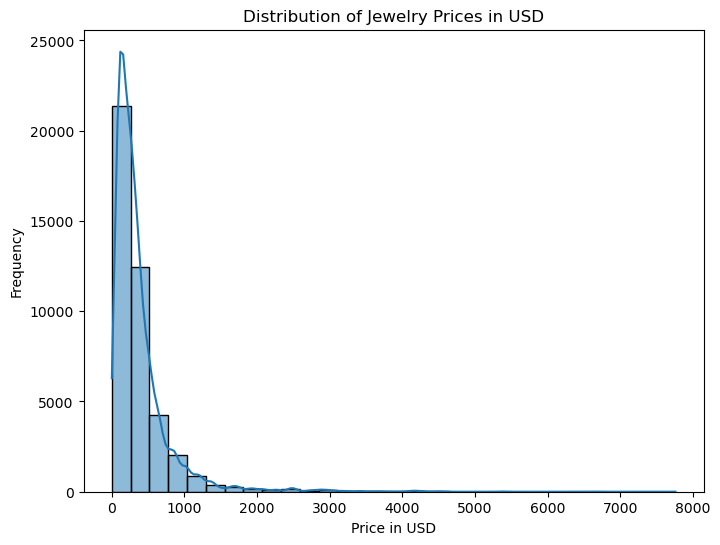

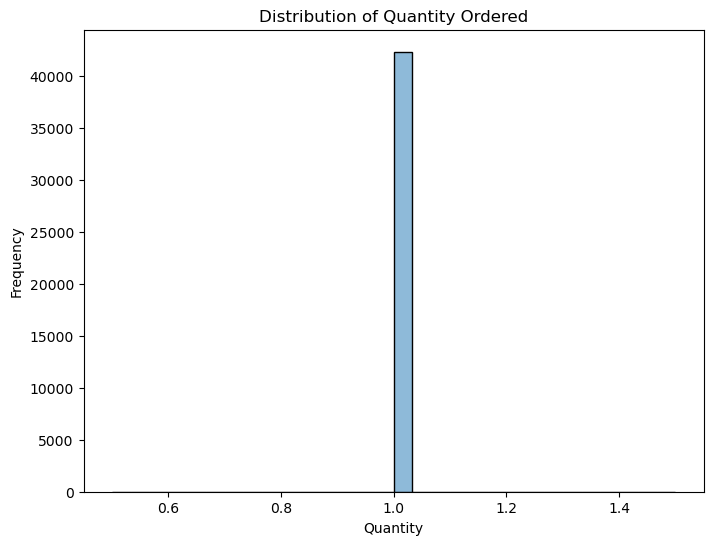

In [32]:
#Statistical Summary and Visualizing Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Get statistical summary
print(df.describe())

# Visualize the distribution of Price in USD
plt.figure(figsize=(8,6))
sns.histplot(df['Price in USD'], bins=30, kde=True)
plt.title('Distribution of Jewelry Prices in USD')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Quantity of SKU in the order
plt.figure(figsize=(8,6))
sns.histplot(df['Quantity of SKU in the order'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


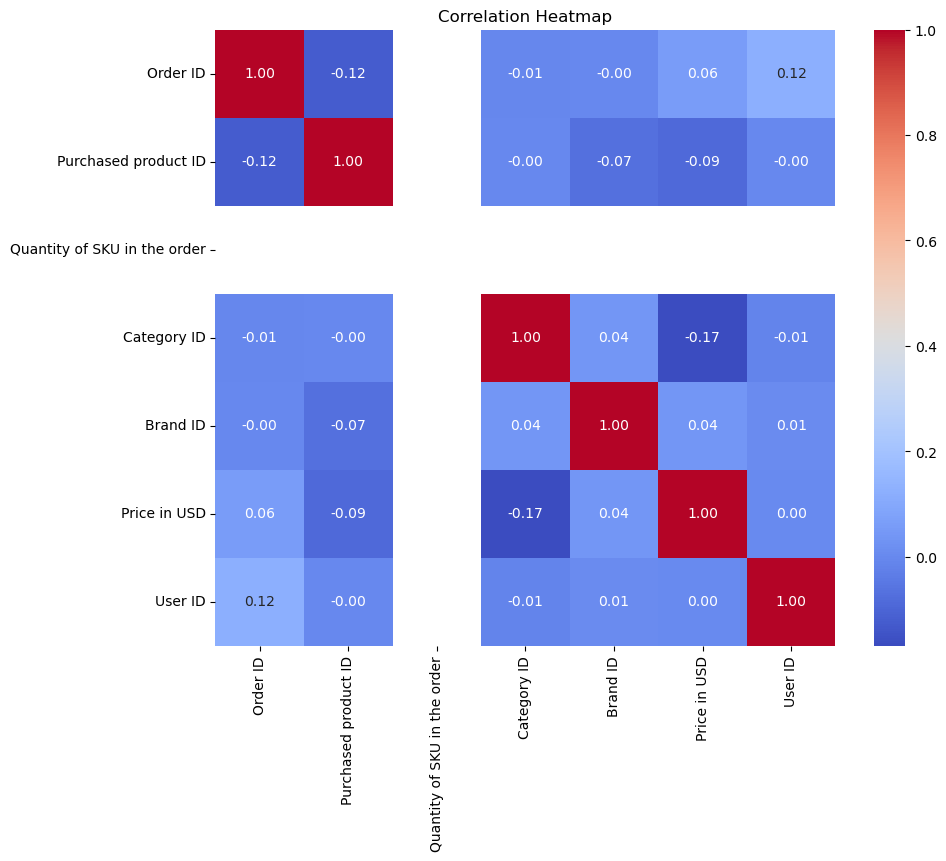

In [33]:
#Analysing Correlation
# Correlation heatmap for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Check the column names
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


In [41]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names again to ensure there are no spaces
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


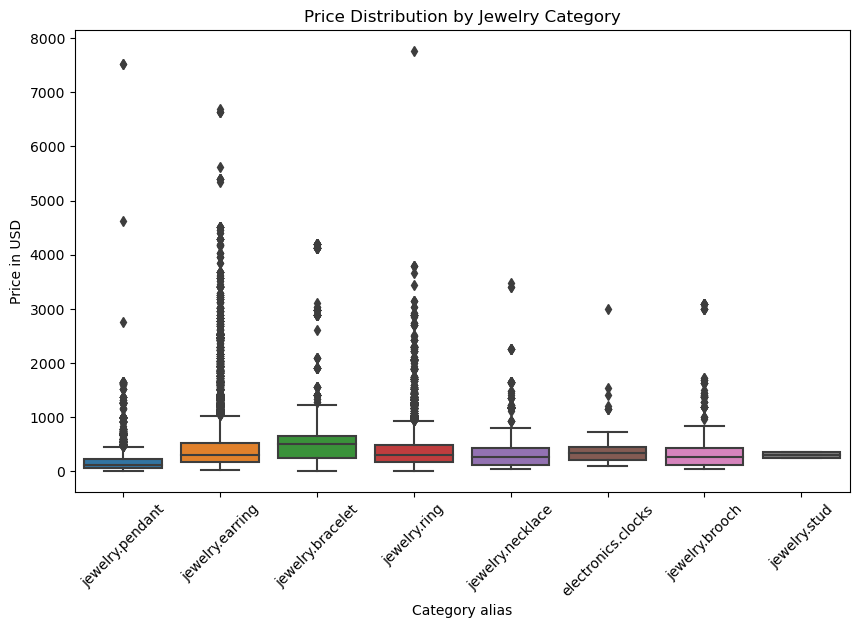

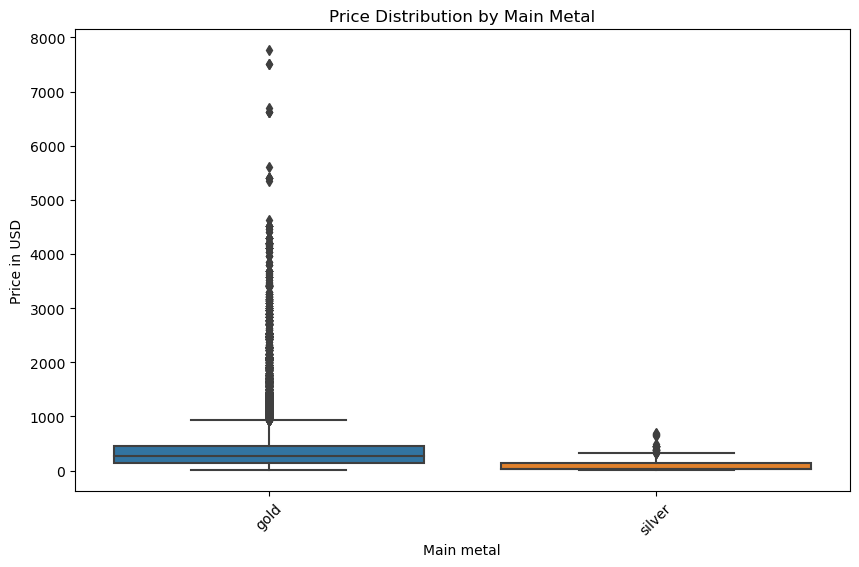

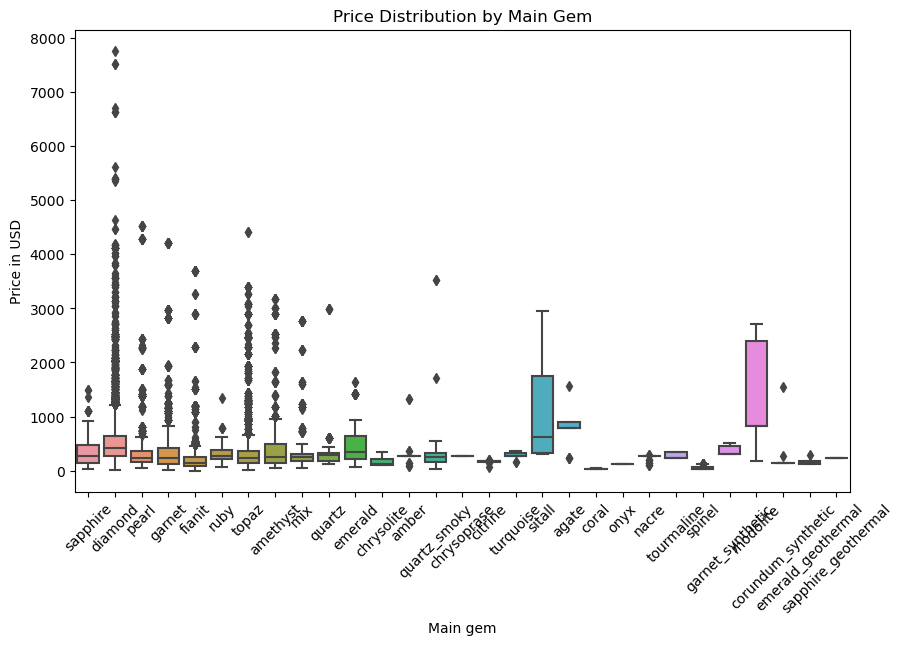

In [42]:
#Categorical Data Analysis (Price vs. Categorical Features)
# Box plot for Price vs Category alias (Jewelry Category)
# Box plot for Price vs Category alias (Jewelry Category)
plt.figure(figsize=(10,6))
sns.boxplot(x='Category alias', y='Price in USD', data=df)  # Corrected argument for data
plt.title('Price Distribution by Jewelry Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


# Box plot for Price vs Main Metal (Material of the Jewelry)
plt.figure(figsize=(10,6))
sns.boxplot(x='Main metal', y='Price in USD', data=df)  # Correct argument for data
plt.title('Price Distribution by Main Metal')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


# Box plot for Price vs Main Gem (Gem type on Jewelry)
plt.figure(figsize=(10,6))
sns.boxplot(x='Main gem', y='Price in USD', data=df)
plt.title('Price Distribution by Main Gem')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Convert 'Order datetime' to datetime type
df['Order datetime'] = pd.to_datetime(df['Order datetime'], errors='coerce')

# Check if the conversion was successful
print(df['Order datetime'].head())


2    2018-12-02 13:53:42+00:00
3    2018-12-02 17:44:02+00:00
8    2018-12-03 07:03:49+00:00
19   2018-12-04 19:55:22+00:00
20   2018-12-04 20:10:22+00:00
Name: Order datetime, dtype: datetime64[ns, UTC]


In [45]:
# Extract the year and month from the 'Order datetime' column
df['Year'] = df['Order datetime'].dt.year
df['Month'] = df['Order datetime'].dt.month

# Check the results
print(df[['Order datetime', 'Year', 'Month']].head())


              Order datetime  Year  Month
2  2018-12-02 13:53:42+00:00  2018     12
3  2018-12-02 17:44:02+00:00  2018     12
8  2018-12-03 07:03:49+00:00  2018     12
19 2018-12-04 19:55:22+00:00  2018     12
20 2018-12-04 20:10:22+00:00  2018     12


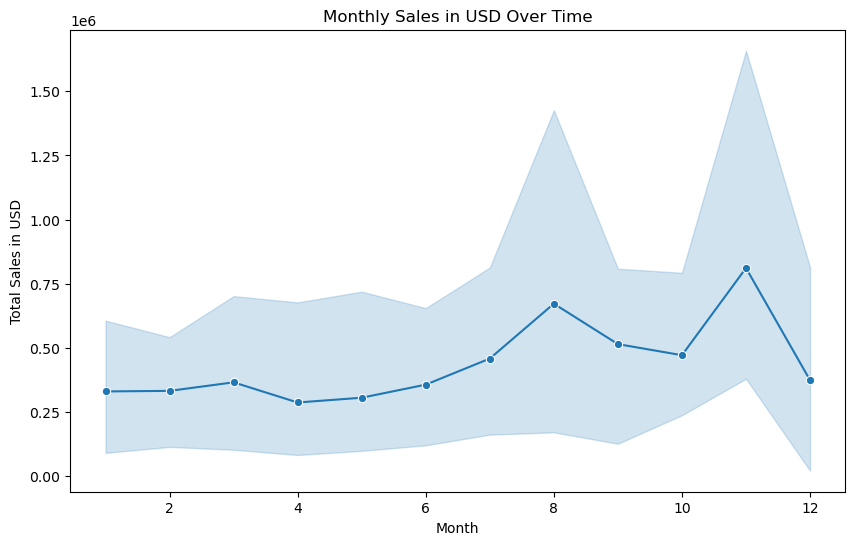

In [46]:
# Analyzing Time Series (Sales over Time)
# Group by year and month, then sum the prices for each period
monthly_sales = df.groupby(['Year', 'Month'])['Price in USD'].sum().reset_index()

# Plotting sales over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Price in USD', data=monthly_sales, marker='o')
plt.title('Monthly Sales in USD Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD')
plt.show()



In [47]:
# Identifying outliers in the price column using IQR
Q1 = df['Price in USD'].quantile(0.25)
Q3 = df['Price in USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(df['Price in USD'] >= lower_bound) & (df['Price in USD'] <= upper_bound)]

# Visualize the filtered data
plt.figure(figsize=(8,6))
sns.boxplot(x=filtered_data['Price in USD'])
plt.title('Price Distribution After Removing Outliers')
plt.show()


NameError: name 'data' is not defined